In [122]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

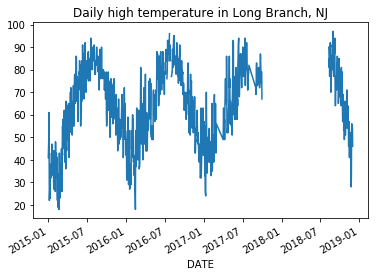

In [111]:
# import weather data for Long Branch, NJ

url = 'https://raw.githubusercontent.com/DanielleRomanoff/DS-Unit-2-Sprint-4-Model-Validation/master/module-1-begin-modeling-process/Weather_LongBranch_NJ.csv'
weather = pd.read_csv(url, parse_dates = ['DATE']).set_index('DATE')
weather['2015': '2018'].TMAX.plot()
plt.title('Daily high temperature in Long Branch, NJ');

In [112]:
# drop Station column - not useful and drop NaN's

weather = weather.drop('STATION', axis = 1)
weather.dropna(inplace = True)
weather.head()

,LATITUDE,LONGITUDE,ELEVATION,TMAX,TMIN,TOBS
DATE,,,,,,
2015-01-01,40.29696,-74.00153,9.1,41.0,22.0,31.0
2015-01-02,40.29696,-74.00153,9.1,44.0,26.0,37.0
2015-01-03,40.29696,-74.00153,9.1,48.0,31.0,48.0
2015-01-04,40.29696,-74.00153,9.1,61.0,40.0,40.0
2015-01-05,40.29696,-74.00153,9.1,40.0,19.0,20.0


In [113]:
# get the mean of the TMAX values

weather.TMAX.mean()

63.971014492753625

In [115]:
weather['TMAX_yesterday'] = weather.TMAX.shift(1)
weather.dropna(inplace = True) # Drops the first date because it doesn't have a 'yesterday'
print(mean_absolute_error(weather.TMAX, weather.TMAX_yesterday))
weather.head()

6.144100580270793


,LATITUDE,LONGITUDE,ELEVATION,TMAX,TMIN,TOBS,TMAX_yesterday
DATE,,,,,,,
2015-01-02,40.29696,-74.00153,9.1,44.0,26.0,37.0,41.0
2015-01-03,40.29696,-74.00153,9.1,48.0,31.0,48.0,44.0
2015-01-04,40.29696,-74.00153,9.1,61.0,40.0,40.0,48.0
2015-01-05,40.29696,-74.00153,9.1,40.0,19.0,20.0,61.0
2015-01-06,40.29696,-74.00153,9.1,22.0,17.0,18.0,40.0


In [114]:
# get the mean absolute weather

predicted = [weather.TMAX.mean()] * len(weather)
mean_absolute_error(weather.TMAX, predicted)

14.42688510817055

In [116]:
X = weather.drop('TMAX_yesterday', axis = 'columns')
y = weather.TMAX_yesterday

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(775, 6)
(259, 6)
(775,)
(259,)


In [130]:
temperature_class = y_train.mode()[0]
y_pred = np.full(shape = y_test.shape, fill_value = temperature_class)
y_pred.shape, y_test.shape

((259,), (259,))

In [124]:
model = LogisticRegression().fit(X,y)
model.score(X,y)

/Users/danielleromanoff/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/danielleromanoff/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.09477756286266925

In [126]:
model.predict(X_test)

array([54., 77., 66., 54., 78., 54., 78., 78., 78., 78., 54., 44., 78.,
       52., 78., 49., 78., 49., 78., 78., 51., 54., 78., 52., 78., 77.,
       87., 58., 54., 58., 78., 77., 51., 78., 77., 77., 78., 52., 66.,
       78., 87., 78., 78., 44., 38., 78., 78., 78., 44., 78., 53., 77.,
       51., 54., 77., 78., 78., 51., 58., 78., 78., 78., 77., 49., 44.,
       87., 54., 54., 78., 78., 78., 66., 44., 54., 52., 78., 78., 78.,
       44., 78., 78., 44., 54., 78., 78., 54., 53., 54., 58., 78., 77.,
       87., 78., 52., 38., 78., 78., 66., 44., 78., 78., 51., 54., 77.,
       54., 78., 38., 80., 51., 78., 53., 58., 78., 80., 66., 51., 58.,
       66., 44., 44., 78., 87., 77., 54., 44., 78., 54., 53., 66., 77.,
       44., 54., 77., 44., 54., 78., 80., 78., 58., 78., 51., 78., 93.,
       66., 78., 77., 78., 77., 62., 54., 77., 58., 54., 87., 78., 80.,
       78., 52., 78., 78., 78., 78., 87., 38., 54., 77., 38., 54., 78.,
       19., 78., 78., 52., 52., 52., 52., 54., 58., 52., 54., 78

In [118]:
pipeline = make_pipeline(StandardScaler(), LogisticRegression(solver = 'lbfgs'))
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
accuracy_score(y_test, y_pred)

/Users/danielleromanoff/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.06563706563706563